# Issue
**Code runs but IoU score doesn't improve at all**

I have tested with
1. Different callbacks
2. Different batch size and epochs
Nothing improves IoU

**Observations**
1. ResNet Encoder omits the crop connections in UNet, so decoder has no direct features from image
2. IoU score varies largely with the value of 

# Set Environment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Set Seed

In [2]:
from numpy.random import seed
seed(19)
tf.random.set_seed(21)

# Define File Paths

In [3]:
from glob import glob

msk_paths = glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
img_paths = [m.replace('_mask','') for m in msk_paths]

# Plot Samples

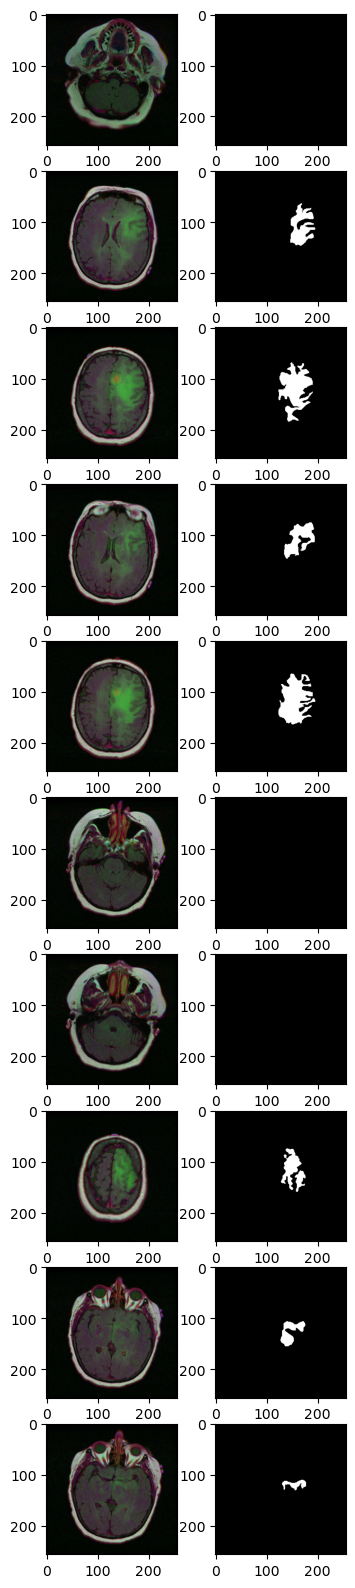

In [4]:
import cv2

rows, colayers = 10, 2

fig = plt.figure(figsize = (4, 20))
for i in range(1, rows*colayers, 2):
    
    fig.add_subplot(rows, colayers, i)
    img = cv2.imread(img_paths[i])
    plt.imshow(img)

    fig.add_subplot(rows, colayers, i+1)
    msk = cv2.imread(msk_paths[i])
    plt.imshow(msk)

# Create Dataframe

In [5]:
mri_df = pd.DataFrame({'img':img_paths,
                       'msk':msk_paths})
mri_df.head()

img  \
0  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
1  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
2  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
3  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
4  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   

                                                 msk  
0  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...  
1  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...  
2  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...  
3  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...  
4  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...

# Test Train Split

In [6]:
from sklearn.model_selection import train_test_split

mri_df_train, mri_df_test = train_test_split(mri_df, test_size = 0.15, random_state=21)
mri_df_train, mri_df_val = train_test_split(mri_df_train, test_size = 0.15, random_state=21)

mri_df_train

img  \
3833  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
2211  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
2656  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
3039  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...   
2096  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
...                                                 ...   
465   ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
368   ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
2029  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
2475  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
3201  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...   

                                                    msk  
3833  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...  
2211  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...  
2656  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...  
3039  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...  
2096  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...  
...                                                 ...  
465   ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...  
368   ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...  
2029  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...  
2475  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...  
3201  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...  

[2838 rows x 2 columns]

# Reset Index

In [7]:
mri_df_train = mri_df_train.reset_index(drop=True)
mri_df_val = mri_df_val.reset_index(drop=True)
mri_df_test = mri_df_test.reset_index(drop=True)

mri_df_train

img  \
0     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
1     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
2     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
3     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...   
4     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
...                                                 ...   
2833  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
2834  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
2835  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
2836  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
2837  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...   

                                                    msk  
0     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...  
1     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...  
2     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...  
3     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...  
4     ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...  
...                                                 ...  
2833  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...  
2834  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...  
2835  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...  
2836  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...  
2837  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...  

[2838 rows x 2 columns]

# Check Shapes

In [8]:
print(f'Train Data Shape: {mri_df_train.shape} \nValidation Data Shape: {mri_df_val.shape} \nTest Data Shape: {mri_df_test.shape}')

Train Data Shape: (2838, 2) 
Validation Data Shape: (501, 2) 
Test Data Shape: (590, 2)


# Data Generator

In [9]:
from keras.preprocessing.image import ImageDataGenerator


BATCH_SIZE = 32
IMG_SIZE = (128,128)

def transformDF(df,
                rotation_range=0.2,
                width_shift_range=0.02,
                height_shift_range=0.02,
                shear_range=0.1,
                zoom_range=0.1,
                horizontal_flip=True,
                IMG_SIZE_TRAIN = IMG_SIZE,
                BATCH_SIZE = BATCH_SIZE):

    img_datag = ImageDataGenerator(rotation_range=rotation_range,
                                   width_shift_range=width_shift_range,
                                   height_shift_range=height_shift_range,
                                   shear_range=shear_range,
                                   zoom_range=zoom_range,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

    msk_datag = ImageDataGenerator(rotation_range=rotation_range,
                                   width_shift_range=width_shift_range,
                                   height_shift_range=height_shift_range,
                                   shear_range=shear_range,
                                   zoom_range=zoom_range,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

    img_generated = img_datag.flow_from_dataframe(df,
                                                  x_col='img',
                                                  class_mode=None,
                                                  color_mode='rgb',
                                                  target_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  save_to_dir=None,
                                                  save_prefix='image',
                                                  seed=2119)

    msk_generated = msk_datag.flow_from_dataframe(df,
                                                  x_col='msk',
                                                  class_mode=None,
                                                  color_mode='grayscale',
                                                  target_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  save_to_dir=None,
                                                  save_prefix='mask',
                                                  seed=2119)

    generated = zip(img_generated, msk_generated)

    for img, msk in generated:
        img = img / 255
        msk = msk / 255

        msk[msk > 0.5] = 1
        msk[msk <= 0.5] = 0

        yield (img,msk)

data_train = transformDF(mri_df_train)
data_val = transformDF(mri_df_val)
data_test = transformDF(mri_df_test)

# Pretrained Base: ResNet152V2

In [10]:
# Define the input shape
input_shape = (128, 128, 3)
# inputs = Input(input_shape, name='input')

pretrained_base = tf.keras.applications.ResNet152V2(weights='imagenet',
                                                    include_top=False,
                                                    input_shape=input_shape)
pretrained_base.trainable = False


# pretrained_base = Model(inputs, outputs)
# Print model summary
pretrained_base.summary()

234545216/234545216 [==============================] - 10s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadd

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

# get layer
x = pretrained_base.get_layer('post_relu').output

# Expanding Path
up6 = Conv2D(512, 2, activation='relu', padding='same', name='up_conv6')(UpSampling2D(size=2)(x))
conv6 = Conv2D(512, 3, activation='relu', name='conv61', padding='same')(up6)
conv6 = Conv2D(512, 3, activation='relu', name='conv62', padding='same')(conv6)

up7 = Conv2D(256, 2, activation='relu', padding='same', name='up_conv7')(UpSampling2D(size=2)(conv6))
conv7 = Conv2D(256, 3, activation='relu', name='conv71', padding='same')(up7)
conv7 = Conv2D(256, 3, activation='relu', name='conv72', padding='same')(conv7)

up8 = Conv2D(128, 2, activation='relu', padding='same', name='up_conv8')(UpSampling2D(size=2)(conv7))
conv8 = Conv2D(128, 3, activation='relu', name='conv81', padding='same')(up8)
conv8 = Conv2D(128, 3, activation='relu', name='conv82', padding='same')(conv8)

up9 = Conv2D(64, 2, activation='relu', padding='same', name='up_conv9')(UpSampling2D(size=2)(conv8))
conv9 = Conv2D(64, 3, activation='relu', name='conv91', padding='same')(up9)
conv9 = Conv2D(64, 3, activation='relu', name='conv92', padding='same')(conv9)

up10 = Conv2D(32, 2, activation='relu', padding='same', name='up_conv10')(UpSampling2D(size=2)(conv9))
conv10 = Conv2D(32, 3, activation='relu', name='conv101', padding='same')(up10)
conv10 = Conv2D(1, 3, activation='relu', name='conv102', padding='same')(conv10)

model = Model(pretrained_base.input, conv10)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 66, 66, 64)   0           ['conv1_conv[0][0]']         

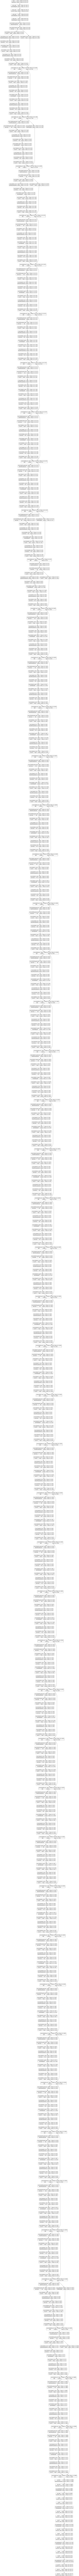

In [12]:
# Plot the model
tf.keras.utils.plot_model(
    model,
    to_file="ResNet152V2+UNetDecoder.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=1200,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

# Dice Score

In [13]:
import keras.backend as K

smooth = 100

def dice_coef(y_true, y_pred):
    intersec = K.sum(y_true * y_pred)
    mod_sum = K.sum(y_true) + K.sum(y_pred)

    return (2 * intersec + smooth) / (mod_sum + smooth)

def dice_coef_loss(y_true, y_pred):
    return - dice_coef(y_true, y_pred)

# IoU Score

In [14]:
def iou_score(y_true, y_pred):    
    intersec = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersec
    
    return (intersec + smooth) / (union + smooth)

def iou_loss(y_true, y_pred):
    return - iou_score(y_true, y_pred)

# Compile and Train Model

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=iou_loss,
              metrics=["binary_accuracy", iou_score, dice_coef])

EPHOCHS = 20

history = model.fit(data_train,
                    steps_per_epoch=(len(mri_df_train) / BATCH_SIZE),
                    epochs=EPHOCHS,
                    callbacks=ModelCheckpoint('ResNet152V2+UNet.hdf5',
                                              verbose=1,
                                              save_best_only=True),
                    validation_data=data_val,
                    validation_steps=len(mri_df_val)/BATCH_SIZE)

Found 2838 validated image filenames.
Found 2838 validated image filenames.
Epoch 1/20
89/88 [==============================] - ETA: 0s - loss: -0.0204 - binary_accuracy: 0.9895 - iou_score: 0.0204 - dice_coef: 0.0205Found 501 validated image filenames.
Found 501 validated image filenames.

Epoch 1: val_loss improved from inf to -0.02246, saving model to ResNet152V2+UNet.hdf5
88/88 [==============================] - 106s 1s/step - loss: -0.0204 - binary_accuracy: 0.9895 - iou_score: 0.0204 - dice_coef: 0.0205 - val_loss: -0.0225 - val_binary_accuracy: 0.9908 - val_iou_score: 0.0227 - val_dice_coef: 0.0227
Epoch 2/20
89/88 [==============================] - ETA: 0s - loss: -0.0211 - binary_accuracy: 0.9895 - iou_score: 0.0212 - dice_coef: 0.0212
Epoch 2: val_loss improved from -0.02246 to -0.02319, saving model to ResNet152V2+UNet.hdf5
88/88 [==============================] - 33s 376ms/step - loss: -0.0211 - binary_accuracy: 0.9895 - iou_score: 0.0212 - dice_coef: 0.0212 - val_loss: -0.

# Evaluate

In [16]:
results = model.evaluate(data_test, steps=len(mri_df_test) / BATCH_SIZE)

Found 590 validated image filenames.
Found 590 validated image filenames.
18/18 [==============================] - 14s 784ms/step - loss: -0.0212 - binary_accuracy: 0.9894 - iou_score: 0.0215 - dice_coef: 0.0215


# Reports

In [17]:
print("Test loss: ", round(results[0],3),
      "\nTest Binary Accuracy: ", round(results[1],3),
      "\nTest IOU: ", round(results[2],3),
      "\nTest Dice Coefficent: ", round(results[3],3))

Test loss:  -0.021 
Test Binary Accuracy:  0.989 
Test IOU:  0.022 
Test Dice Coefficent:  0.022


# Plot Predictions

1/1 [==============================] - 3s 3s/step


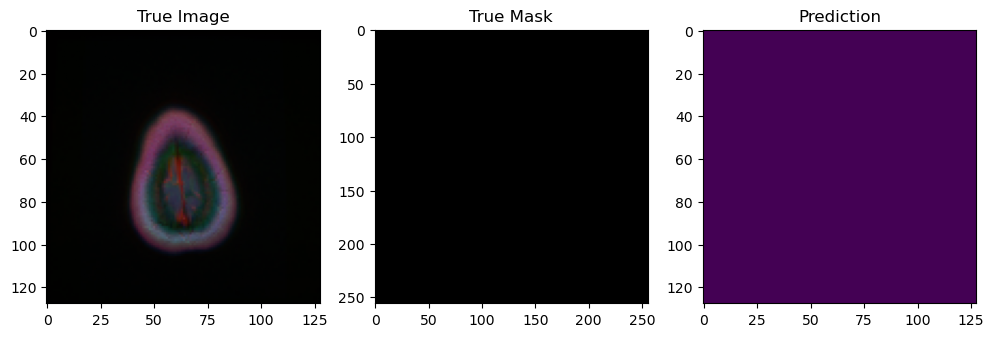

1/1 [==============================] - 0s 34ms/step


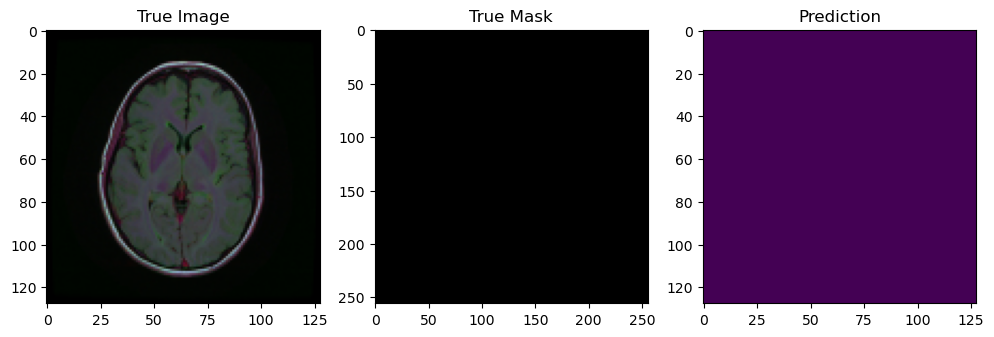

1/1 [==============================] - 0s 34ms/step


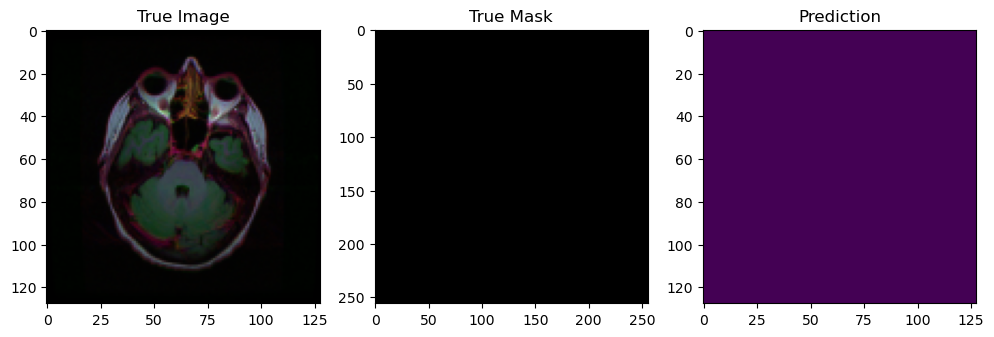

1/1 [==============================] - 0s 33ms/step


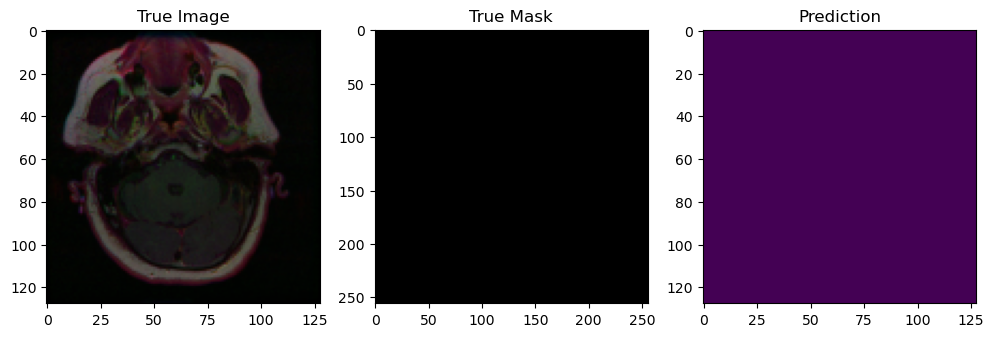

1/1 [==============================] - 0s 36ms/step


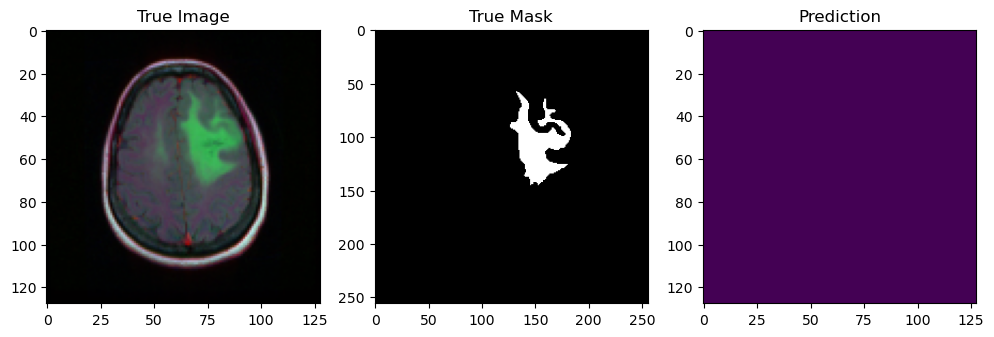

1/1 [==============================] - 0s 35ms/step


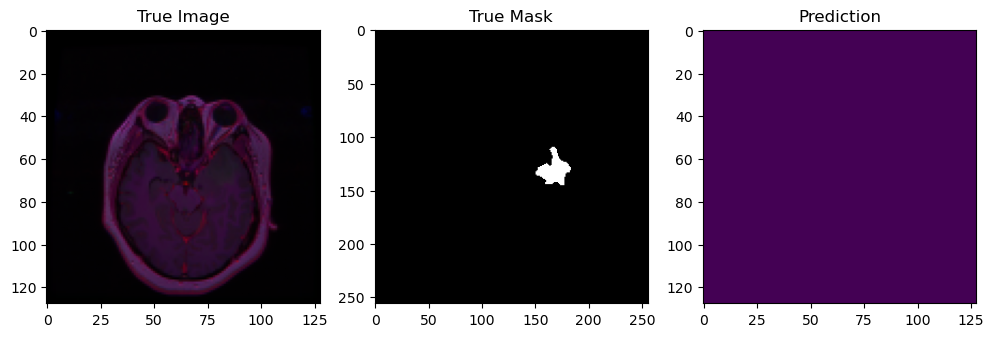

1/1 [==============================] - 0s 32ms/step


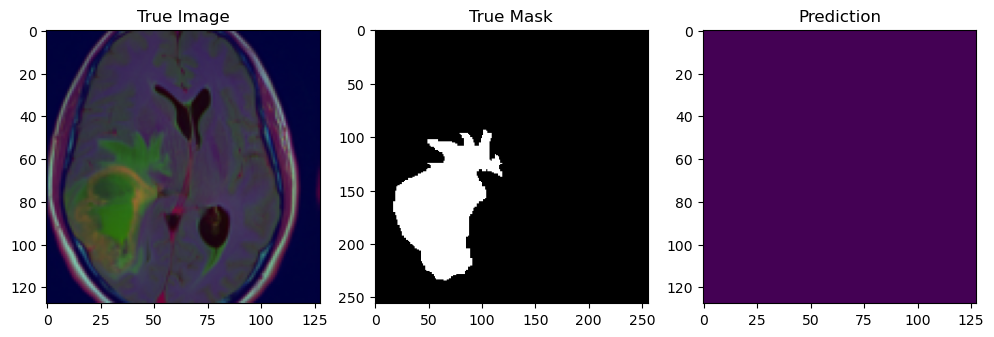

1/1 [==============================] - 0s 32ms/step


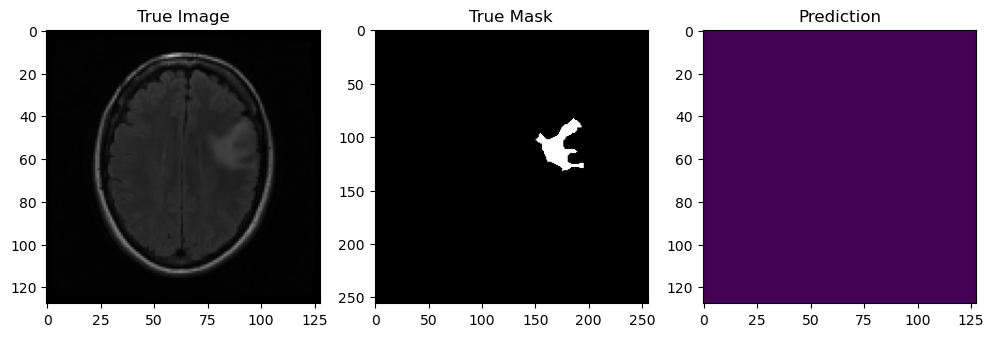

1/1 [==============================] - 0s 33ms/step


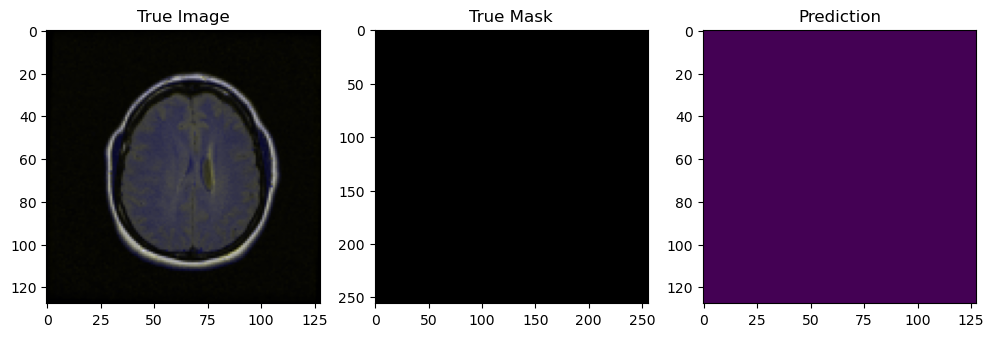

1/1 [==============================] - 0s 32ms/step


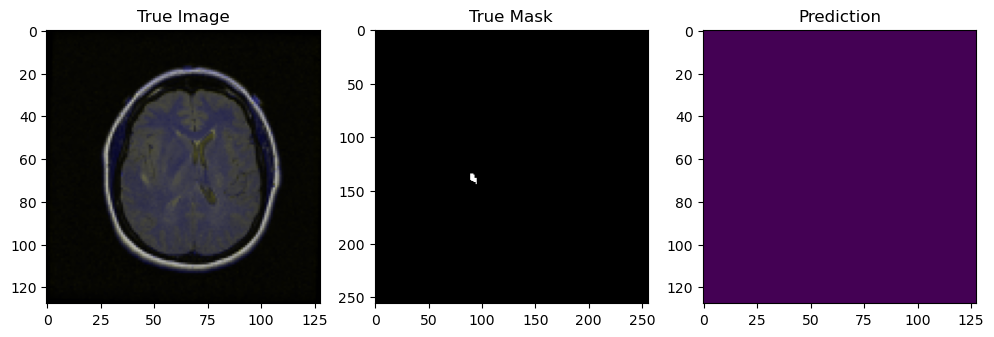

1/1 [==============================] - 0s 34ms/step


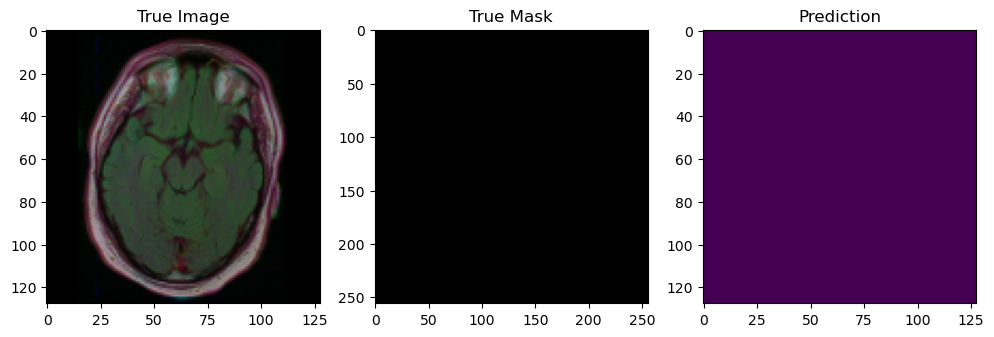

1/1 [==============================] - 0s 32ms/step


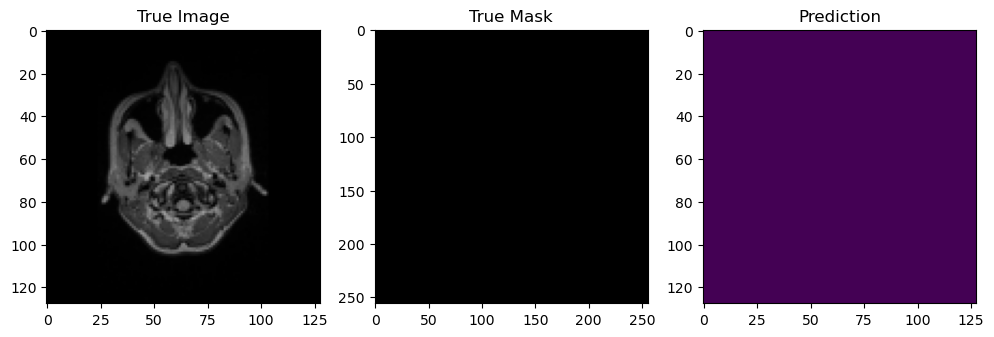

1/1 [==============================] - 0s 36ms/step


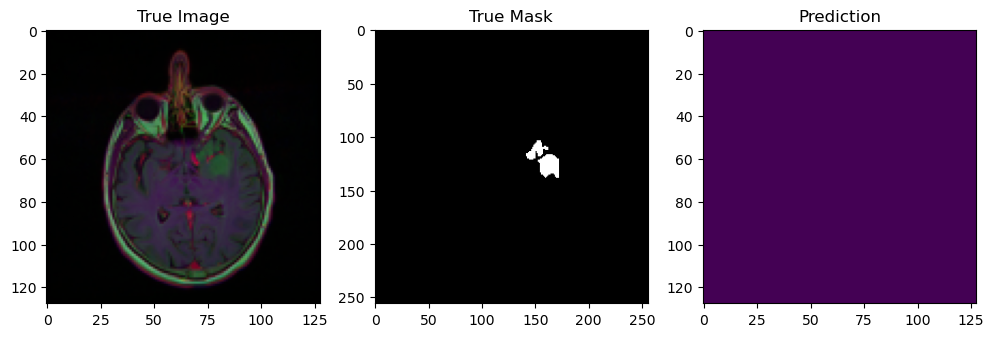

1/1 [==============================] - 0s 34ms/step


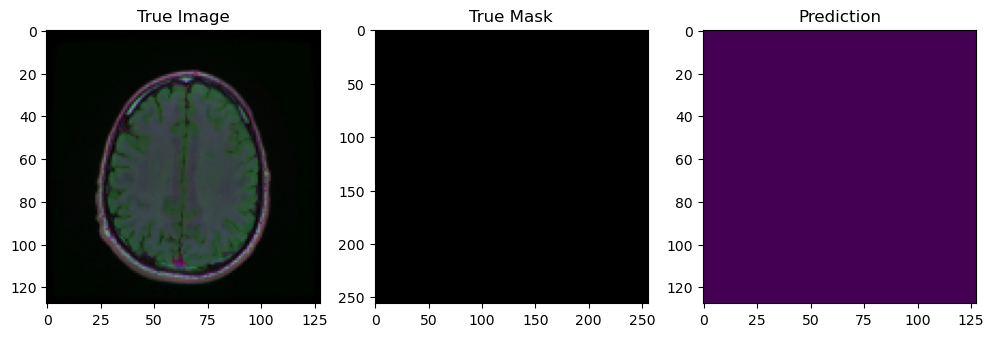

1/1 [==============================] - 0s 33ms/step


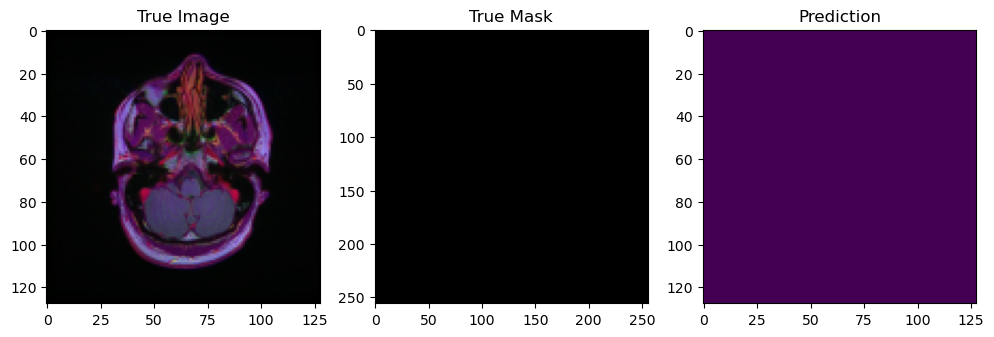

1/1 [==============================] - 0s 32ms/step


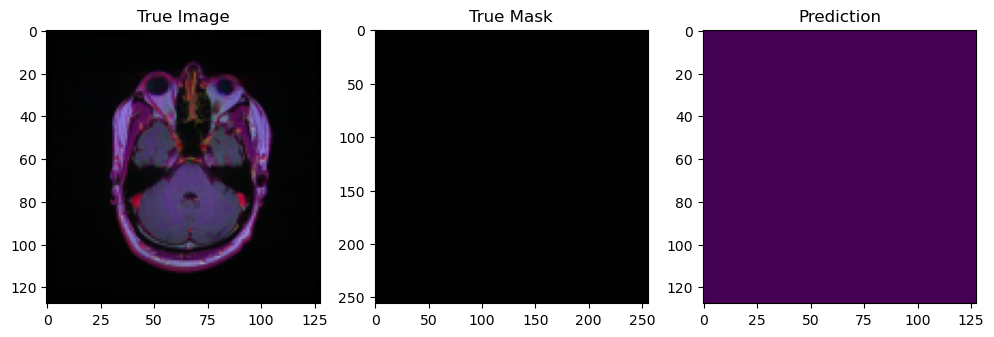

1/1 [==============================] - 0s 33ms/step


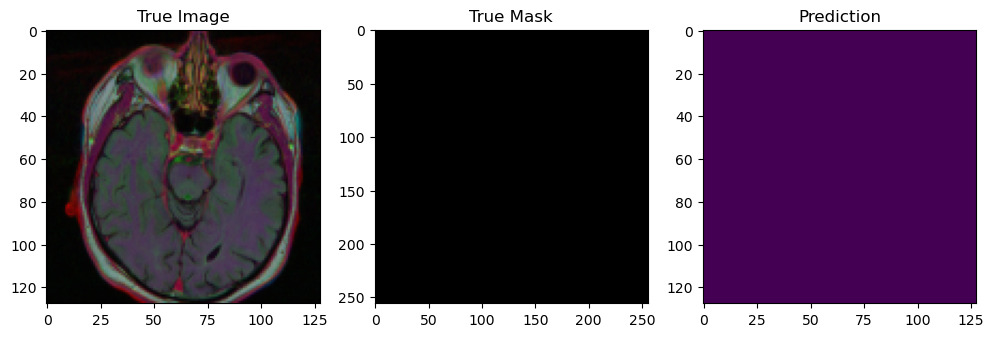

1/1 [==============================] - 0s 32ms/step


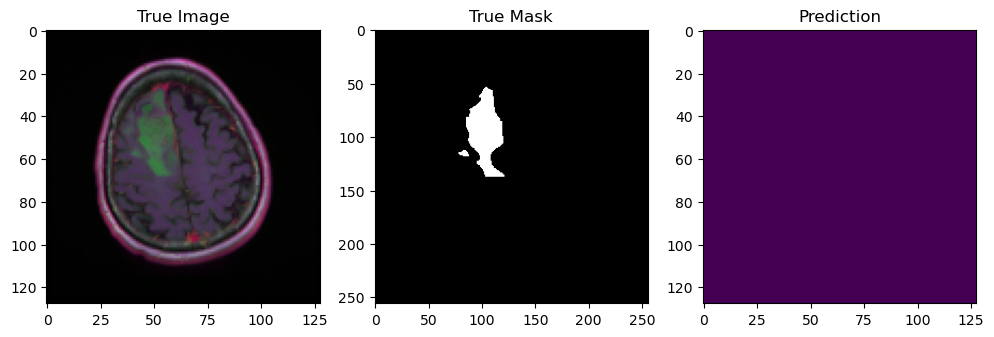

1/1 [==============================] - 0s 33ms/step


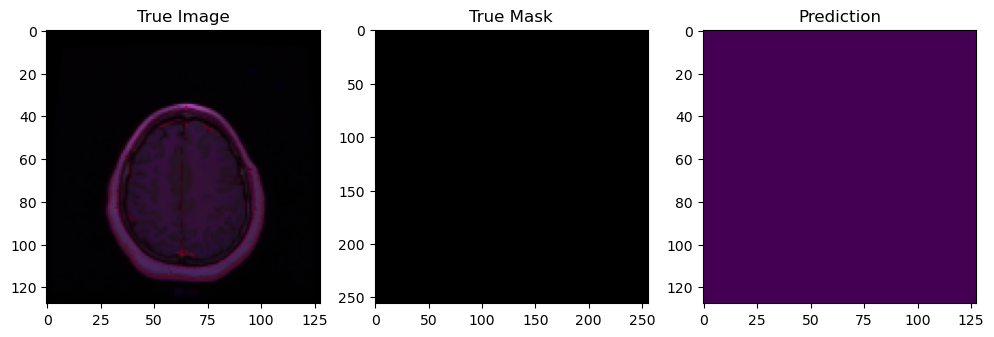

1/1 [==============================] - 0s 35ms/step


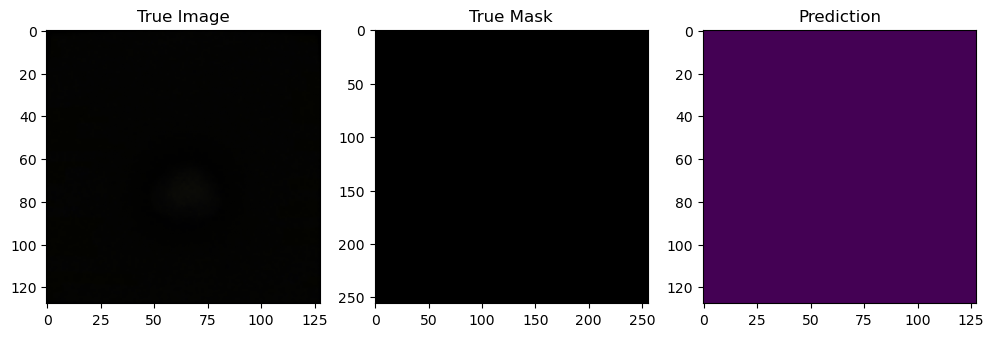

In [18]:
for i in range(20):
    index=np.random.randint(1,len(mri_df_test.index))
    img = cv2.imread(mri_df_test['img'].iloc[index])
    img = cv2.resize(img ,IMG_SIZE)
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('True Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(mri_df_test['msk'].iloc[index])))
    plt.title('True Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()